In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
label = LabelEncoder()
data['Genre'] = label.fit_transform(data['Genre'])

In [8]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
scaler = StandardScaler()
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])


In [10]:

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
train['Cluster'] = kmeans.fit_predict(train[['Annual Income (k$)', 'Spending Score (1-100)']])


In [12]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3)
train['Cluster_Hierarchical'] = agglomerative.fit_predict(train[['Annual Income (k$)', 'Spending Score (1-100)']])


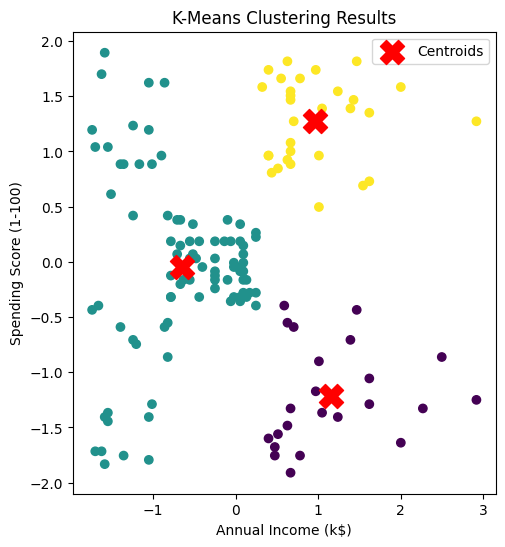

In [13]:
# Centroid points for K-Means
centroids = kmeans.cluster_centers_
# Plot K-Means Clustering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(train['Annual Income (k$)'], train['Spending Score (1-100)'], c=train['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Results')
plt.legend()

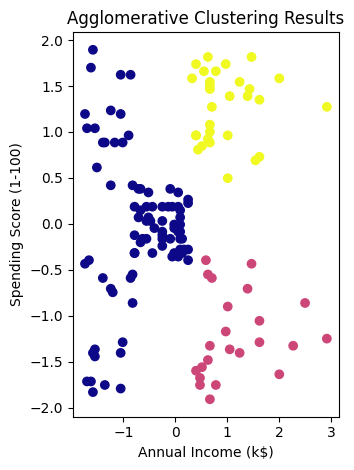

In [14]:
# Plot Agglomerative Clustering
plt.subplot(1, 2, 2)
plt.scatter(train['Annual Income (k$)'], train['Spending Score (1-100)'], c=train['Cluster_Hierarchical'], cmap='plasma')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering Results')

plt.tight_layout()
plt.show()